# 中華職棒2020上半季逐球資料整理 --投手篇

投手資料整理：
1. 球數絕對領先下一顆位置、好壞球
2. 每個投手對決時刻常用球種、進壘位置（2好2壞)
3. 後援連續出賽成績（有休息、連二、連三）

In [1]:
import pandas as pd

In [2]:
# 原始資料
df = pd.read_excel('../OpenData/2020中華職棒上半季-電子紀錄程式檔-revised-20200925.xlsx', sheet_name='工作表1')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

# 1. 球數絕對領先下一顆位置比率

In [4]:
# 查看有哪些進壘位置
NineGrid = set(df['進壘位置'].astype('str').to_list())
NineGrid.remove('nan') # 把nan去掉
NineGrid = list(NineGrid)

In [5]:
df1 = df.loc[:,['投手', 'Count', '進壘位置', '好壞球']]
twoStrike = df1[df1['Count'] == '2好0壞']

In [6]:
# groupby
twoStrike_df = pd.DataFrame()
Stat = twoStrike.groupby('投手')
for i in set(twoStrike['投手']):
    pitcher = Stat.get_group(i)['進壘位置'].value_counts()
    pitcher.name = i
    twoStrike_df = twoStrike_df.append(pitcher)
twoStrike_df.fillna(0, inplace=True)
twoStrike_df.columns = [i+'(單位：%)' for i in twoStrike_df.columns]
total = twoStrike_df.sum(axis=1)
total.name = '總球數'
twoStrike_df = pd.concat([twoStrike_df,total], axis=1)
twoStrike_df.iloc[:,:-1] = twoStrike_df.iloc[:,:-1].div(twoStrike_df.iloc[:,:-1].sum(axis=1),axis=0)
twoStrike_df.iloc[:,:-1] = round(twoStrike_df.iloc[:,:-1] * 100,2)

In [7]:
twoStrike_df[twoStrike_df['總球數'] >= 80].sort_values(by='總球數',ascending=False)

,中中(單位：%),中低(單位：%),中偏低(單位：%),中偏高(單位：%),偏內角低(單位：%),偏內角偏低(單位：%),偏內角偏高(單位：%),偏外角中(單位：%),偏外角低(單位：%),偏外角偏低(單位：%),偏外角偏高(單位：%),偏外角高(單位：%),內角中(單位：%),內角低(單位：%),內角偏低(單位：%),內角偏高(單位：%),內角高(單位：%),外角中(單位：%),外角低(單位：%),外角偏低(單位：%),外角偏高(單位：%),外角高(單位：%),中高(單位：%),偏內角中(單位：%),偏內角高(單位：%),總球數
富邦索沙,0.78,2.34,5.47,3.12,1.56,2.34,3.12,7.03,4.69,5.47,5.47,9.38,2.34,4.69,2.34,5.47,1.56,5.47,12.50,7.81,2.34,3.12,0.78,0.00,0.78,128.0
兄弟米蘭達,0.90,1.80,1.80,0.90,5.41,4.50,1.80,3.60,4.50,4.50,5.41,4.50,0.90,7.21,9.91,0.90,4.50,5.41,8.11,6.31,8.11,3.60,0.90,2.70,1.80,111.0
兄弟黃恩賜,4.30,7.53,9.68,3.23,2.15,2.15,1.08,2.15,5.38,8.60,5.38,2.15,3.23,6.45,2.15,3.23,1.08,4.30,3.23,10.75,3.23,1.08,2.15,4.30,1.08,93.0
樂天霸能,1.16,3.49,1.16,0.00,3.49,2.33,4.65,3.49,5.81,4.65,6.98,8.14,2.33,9.30,1.16,5.81,2.33,3.49,11.63,4.65,1.16,5.81,3.49,2.33,1.16,86.0
樂天卡本特,0.00,3.49,6.98,2.33,0.00,4.65,2.33,0.00,9.30,6.98,5.81,1.16,2.33,5.81,10.47,1.16,2.33,9.30,6.98,5.81,4.65,3.49,2.33,1.16,1.16,86.0
兄弟德保拉,2.50,0.00,3.75,0.00,3.75,3.75,3.75,12.50,10.00,3.75,6.25,12.50,5.00,1.25,1.25,2.50,2.50,2.50,2.50,3.75,2.50,5.00,1.25,1.25,6.25,80.0


# 2. 每個投手對決時刻(2好2壞)常用球種、進壘位置(用九宮格顯示)
# 未完成

In [8]:
import matplotlib.pyplot as plt

In [9]:
df2 = df.loc[:,['投手', 'Count','進壘點X', '進壘點Y', '球種', '好壞球']]
df2 = df2[df2['Count'] == '2好2壞']
df2 = df2.fillna(0)

In [10]:
df2 = df2[(df2['球種'] != '無法判定') & (df2['球種'] != 'nan')]

In [11]:
# 進壘點處理參照好球帶與落點座標.xlsx
# 25宮格4極點
leftTop = [15.5, 22.8]
leftDown = [15.5, 148.7]
rightTop = [129.5, 22.8]
rightDown = [129.5, 148.7]

In [12]:
# 進壘點處理參照好球帶與落點座標.xlsx
# 製作25宮格，編號順序為左上到右下，7-10, 12-14, 17-19 為好球，其餘為壞球
twoballtwostrike = {}
leftTop = [15.5, 22.8] #左上角座標
for name in set(df2['投手']):
    twoballtwostrike[name] = [0 for i in range(25)]
    t = df2.groupby('投手').get_group(name)
    for i in range(len(t)):
        coordinate  = t.iloc[i,2:4].to_list()
        
        if coordinate[0] >= 15.5 and coordinate[0] <= 129.5 and coordinate[1] >= 22.8 and coordinate[1] <= 148.7:
            countX = 1
            countY = 1
            x = coordinate[0] - leftTop[0]
            y = coordinate[1] - leftTop[1]
            while True:
                x -= 23.2
                if x < 1:
                    break
                countX += 1
            while True:
                y -= 28.5
                if y < 1:
                    break
                countY += 1
            twoballtwostrike[name][countX + (countY-1) * 5 - 1] += 1

In [36]:
# 統計每格的球數
pd.DataFrame(twoballtwostrike, index = [i for i in range(1,26)]).T.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
兄弟萊福力,0,2,0,4,1,0,2,2,2,2,1,10,3,10,0,3,7,5,4,1,0,2,1,2,0
樂天霸能,0,2,1,1,0,2,4,1,7,1,4,7,5,5,2,5,13,6,4,1,0,2,2,1,0
統一費爾本,0,0,2,0,0,0,1,0,1,2,1,6,1,5,0,0,7,5,7,7,0,0,2,4,1
統一江承峰,0,0,1,0,0,0,1,4,1,0,0,2,0,0,0,1,2,2,3,1,0,0,0,1,0
兄弟彭識穎,0,2,0,1,0,1,1,2,1,0,0,5,2,3,0,0,0,1,1,0,0,2,0,1,0


In [39]:
# 中文化
import matplotlib as mpl
mpl.rcParams[u'font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

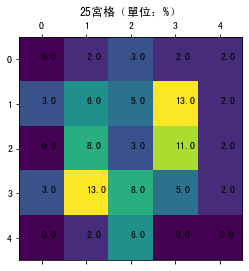

In [41]:
# 畫成圖 看投球熱區在哪 
# 以翁瑋均為例
plt.matshow([twoballtwostrike['樂天翁瑋均'][:5], twoballtwostrike['樂天翁瑋均'][5:10],
            twoballtwostrike['樂天翁瑋均'][10:15], twoballtwostrike['樂天翁瑋均'][15:20], 
            twoballtwostrike['樂天翁瑋均'][20:25]])
c = 0
for i in range(5):
    for j in range(5):
        plt.text(x=j, y=i, s=round(twoballtwostrike['樂天翁瑋均'][c] / sum(twoballtwostrike['樂天翁瑋均']), 2) * 100)
        c+=1
plt.title('25宮格（單位：%）')
plt.show()

# 後援連續出賽成績(以日期為單位)

In [12]:
import re
from dateutil.parser import parse

In [13]:
df3 = df.loc[:,['game_id', 'game id 3','game id 1', '投手', '主隊得分', '客隊得分', '局數', 'Inning Half', '好壞球', '結果', '得分者', '非自責分','自責分', '出局']]
df3 = df3.fillna(0)

In [14]:
# 局數、三振數、被安打數
games = {}
for pitch in set(df3.投手):
    if pitch not in games:
        games[pitch] = [0, 0, 0, 0]
    pitcher = df3[df3['投手'] == pitch]
    day = list(set(pitcher['game id 1']))
    for i in range(len(day) - 1):
        if (parse(str(day[i + 1])) - parse(str(day[i]))).days == 1:
            ballbyball = pitcher[pitcher['game id 1'] == day[i + 1]]
            games[pitch][0] += 1
            games[pitch][1] += ballbyball['出局'].sum()
            games[pitch][2] += ballbyball[(ballbyball['結果'] == '三振') | (ballbyball['結果'] == '揮空三振') | 
                                          (ballbyball['結果'] == '觸擊三振') | (ballbyball['結果'] == '不死三振')]['結果'].count()
            games[pitch][3] += ballbyball[(ballbyball['結果'] == '2壘安') | (ballbyball['結果'] == '內野安打') |
                                          (ballbyball['結果'] == '一壘安') | (ballbyball['結果'] == '三壘安') |
                                          (ballbyball['結果'] == '二壘安') | (ballbyball['結果'] == '全壘打') |
                                          (ballbyball['結果'] == '安打')]['結果'].count()

In [15]:
games_df = pd.DataFrame(games, index=['出賽次數','出局數', '三振', '被安打']).T
games_df['每局被打擊率'] = round(games_df['被安打'] / games_df['出局數'], 3)
games_df[games_df['出賽次數'] > 3].sort_values(by='出局數',ascending=False)

,出賽次數,出局數,三振,被安打,每局被打擊率
富邦陳鴻文,6.0,22.0,4.0,5.0,0.227
兄弟蔡齊哲,7.0,18.0,3.0,6.0,0.333
富邦王尉永,7.0,17.0,5.0,11.0,0.647
樂天王躍霖,6.0,17.0,3.0,8.0,0.471
富邦林羿豪,7.0,15.0,5.0,7.0,0.467
樂天陳禹勳,7.0,15.0,6.0,5.0,0.333
樂天蘇俊璋,6.0,14.0,6.0,5.0,0.357
統一黃竣彥,6.0,12.0,0.0,6.0,0.500
兄弟李振昌,4.0,12.0,6.0,1.0,0.083
樂天黃子鵬,4.0,11.0,0.0,10.0,0.909
